<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/MFBD_TP5_Arbre_de_d%C3%A9cision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # TD : Les arbres de décisions

In [13]:
# Installation et chargement des bibliothèques nécessaires
# Si les packages ne sont pas installés, décommentez les lignes suivantes :
# install.packages("rpart")
# install.packages("rpart.plot")
# install.packages("caret")

library(rpart)
library(rpart.plot)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**## EXERCICE 1 :**




In [14]:
# Création du jeu de données d'apprentissage
donnees_apprentissage <- data.frame(
  Meteo = c("soleil", "soleil", "soleil", "soleil", "nuages", "nuages", "nuages", "nuages", "soleil"),
  Amis = c("presents", "absents", "presents", "absents", "absents", "presents", "absents", "presents", "absents"),
  Vent = c("faible", "fort", "fort", "faible", "faible", "fort", "fort", "faible", "faible"),
  Jour = c("week-end", "semaine", "semaine", "semaine", "week-end", "week-end", "semaine", "week-end", "week-end"),
  Decision = factor(c("oui", "non", "non", "oui", "non", "non", "non", "oui", "non"))
)

# Conversion des variables en facteurs
donnees_apprentissage$Meteo <- factor(donnees_apprentissage$Meteo)
donnees_apprentissage$Amis <- factor(donnees_apprentissage$Amis)
donnees_apprentissage$Vent <- factor(donnees_apprentissage$Vent)
donnees_apprentissage$Jour <- factor(donnees_apprentissage$Jour)

# Affichage des données
cat("Données d'apprentissage :\n")
print(donnees_apprentissage)
cat("\n")

Données d'apprentissage :
   Meteo     Amis   Vent     Jour Decision
1 soleil presents faible week-end      oui
2 soleil  absents   fort  semaine      non
3 soleil presents   fort  semaine      non
4 soleil  absents faible  semaine      oui
5 nuages  absents faible week-end      non
6 nuages presents   fort week-end      non
7 nuages  absents   fort  semaine      non
8 nuages presents faible week-end      oui
9 soleil  absents faible week-end      non



In [15]:
# Construction de l'arbre de décision
arbre_complet <- rpart(
  Decision ~ Meteo + Amis + Vent + Jour,
  data = donnees_apprentissage,
  method = "class",
  control = rpart.control(minsplit = 1, minbucket = 1, cp = 0)
)

# Affichage de l'arbre
cat("Structure de l'arbre complet :\n")
print(arbre_complet)
cat("\n")

Structure de l'arbre complet :
n= 9 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 9 3 non (0.6666667 0.3333333)  
   2) Vent=fort 4 0 non (1.0000000 0.0000000) *
   3) Vent=faible 5 2 oui (0.4000000 0.6000000)  
     6) Amis=absents 3 1 non (0.6666667 0.3333333)  
      12) Jour=week-end 2 0 non (1.0000000 0.0000000) *
      13) Jour=semaine 1 0 oui (0.0000000 1.0000000) *
     7) Amis=presents 2 0 oui (0.0000000 1.0000000) *



In [23]:
# Règles de décision
cat("\nRègles de décision extraites :\n")
print(arbre_complet$frame)
cat("\n")

# Importance des variables
cat("Importance des variables :\n")
print(arbre_complet$variable.importance)
cat("\n\n")


Règles de décision extraites :
      var n wt dev yval complexity ncompete nsurrogate  yval2.V1  yval2.V2
1    Vent 9  9   3    1  0.3333333        3          1 1.0000000 6.0000000
2  <leaf> 4  4   0    1  0.0000000        0          0 1.0000000 4.0000000
3    Amis 5  5   2    2  0.3333333        2          0 2.0000000 2.0000000
6    Jour 3  3   1    1  0.3333333        1          0 1.0000000 2.0000000
12 <leaf> 2  2   0    1  0.0000000        0          0 1.0000000 2.0000000
13 <leaf> 1  1   0    2  0.0000000        0          0 2.0000000 0.0000000
7  <leaf> 2  2   0    2  0.0000000        0          0 2.0000000 0.0000000
    yval2.V3  yval2.V4  yval2.V5 yval2.nodeprob
1  3.0000000 0.6666667 0.3333333      1.0000000
2  0.0000000 1.0000000 0.0000000      0.4444444
3  3.0000000 0.4000000 0.6000000      0.5555556
6  1.0000000 0.6666667 0.3333333      0.3333333
12 0.0000000 1.0000000 0.0000000      0.2222222
13 1.0000000 0.0000000 1.0000000      0.1111111
7  2.0000000 0.0000000 1.0000000

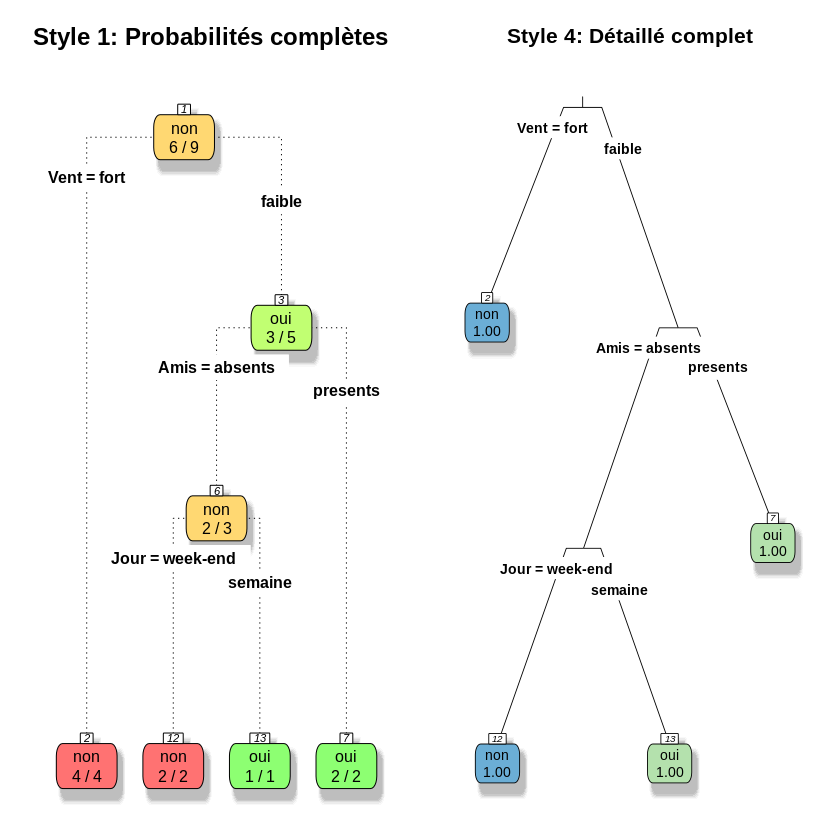

In [17]:
par(mfrow = c(1, 2), mar = c(2, 2, 3, 2))

# Style 1 : Style classique avec probabilités
rpart.plot(arbre_complet,
           type = 4,
           extra = 2,
           main = "Style 1: Probabilités complètes",
           box.palette = "RdYlGn",
           shadow.col = "gray",
           branch.lty = 3,
           nn = TRUE,
           fallen.leaves = TRUE,
           cex = 0.8)

# Style 4 : Style détaillé avec toutes les infos
rpart.plot(arbre_complet,
           type = 3,
           extra = 8,
           main = "Style 4: Détaillé complet",
           box.palette = "auto",
           shadow.col = "gray",
           nn = TRUE,
           fallen.leaves = FALSE,
           cex = 0.7)

par(mfrow = c(1, 1))

cat("\n")

## ***EXERCICE 2 :*** Élagage de l'arbre




In [19]:
# Création du jeu de données de validation pour l'élagage
donnees_validation <- data.frame(
  Meteo = c("soleil", "nuages", "soleil", "soleil", "nuages"),
  Amis = c("presents", "absents", "absents", "absents", "presents"),
  Vent = c("fort", "faible", "faible", "faible", "faible"),
  Jour = c("week-end", "semaine", "week-end", "semaine", "semaine"),
  Decision = factor(c("non", "non", "oui", "non", "oui"))
)

# Conversion en facteurs
donnees_validation$Meteo <- factor(donnees_validation$Meteo, levels = levels(donnees_apprentissage$Meteo))
donnees_validation$Amis <- factor(donnees_validation$Amis, levels = levels(donnees_apprentissage$Amis))
donnees_validation$Vent <- factor(donnees_validation$Vent, levels = levels(donnees_apprentissage$Vent))
donnees_validation$Jour <- factor(donnees_validation$Jour, levels = levels(donnees_apprentissage$Jour))

cat("Données de validation :\n")
print(donnees_validation)
cat("\n")

# Prédictions avec l'arbre complet
predictions_complet <- predict(arbre_complet, donnees_validation, type = "class")
cat("Prédictions de l'arbre complet :\n")
print(data.frame(
  Attendu = donnees_validation$Decision,
  Predit = predictions_complet,
  Correct = donnees_validation$Decision == predictions_complet
))
cat("\n")

# Calcul de la précision sur les données de validation
precision_complet <- mean(predictions_complet == donnees_validation$Decision)
cat(sprintf("Précision de l'arbre complet : %.2f%%\n\n", precision_complet * 100))





Données de validation :
   Meteo     Amis   Vent     Jour Decision
1 soleil presents   fort week-end      non
2 nuages  absents faible  semaine      non
3 soleil  absents faible week-end      oui
4 soleil  absents faible  semaine      non
5 nuages presents faible  semaine      oui

Prédictions de l'arbre complet :
  Attendu Predit Correct
1     non    non    TRUE
2     non    oui   FALSE
3     oui    non   FALSE
4     non    oui   FALSE
5     oui    oui    TRUE

Précision de l'arbre complet : 40.00%



Tableau des paramètres de complexité :

Classification tree:
rpart(formula = Decision ~ Meteo + Amis + Vent + Jour, data = donnees_apprentissage, 
    method = "class", control = rpart.control(minsplit = 1, minbucket = 1, 
        cp = 0))

Variables actually used in tree construction:
[1] Amis Jour Vent

Root node error: 3/9 = 0.33333

n= 9 

       CP nsplit rel error xerror   xstd
1 0.33333      0         1      1 0.4714
2 0.00000      3         0      1 0.4714

Paramètre de complexité optimal : 0.3333

Structure de l'arbre élagué :
n= 9 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 9 3 non (0.6666667 0.3333333) *



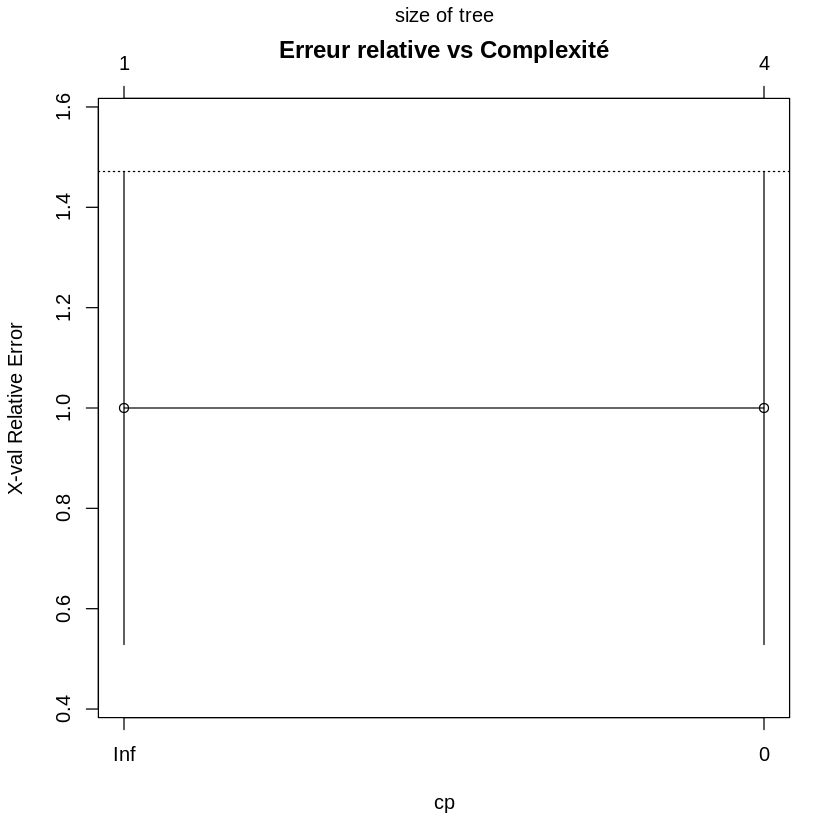

In [20]:
# Analyse du paramètre de complexité (CP)
cat("Tableau des paramètres de complexité :\n")
printcp(arbre_complet)
cat("\n")

# Visualisation de l'erreur en fonction de CP
plotcp(arbre_complet, main = "Erreur relative vs Complexité")

# Élagage basé sur le CP optimal
cp_optimal <- arbre_complet$cptable[which.min(arbre_complet$cptable[,"xerror"]),"CP"]
cat(sprintf("Paramètre de complexité optimal : %.4f\n\n", cp_optimal))

arbre_elague <- prune(arbre_complet, cp = cp_optimal)

cat("Structure de l'arbre élagué :\n")
print(arbre_elague)
cat("\n")

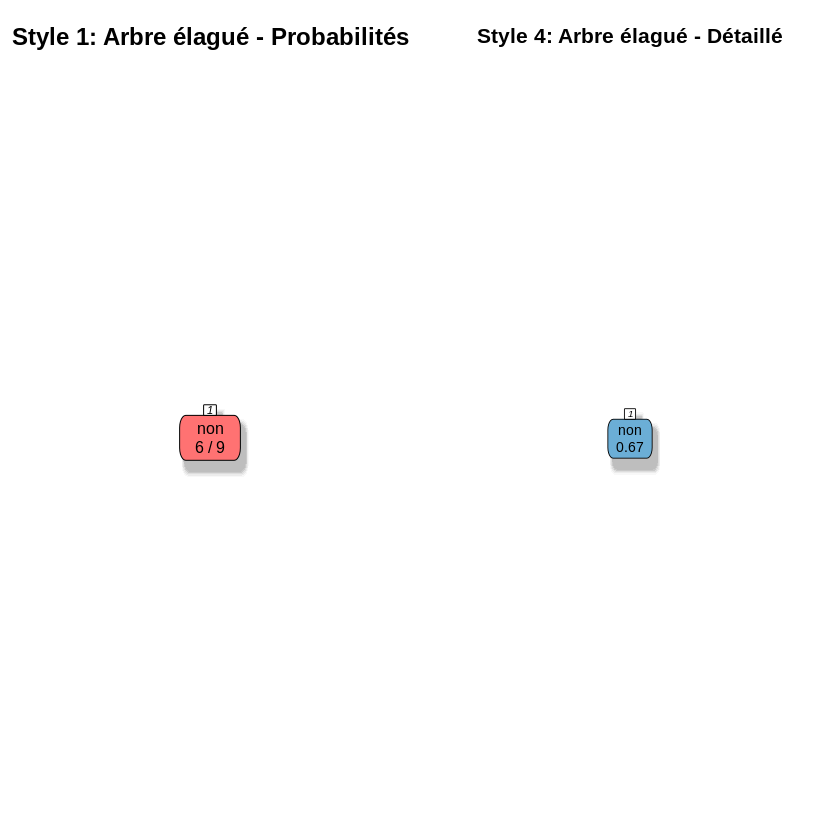

In [21]:
par(mfrow = c(1, 2), mar = c(2, 2, 3, 2))

# Style 1 : Style classique avec probabilités
rpart.plot(arbre_elague,
           type = 4,
           extra = 2,
           main = "Style 1: Arbre élagué - Probabilités",
           box.palette = "RdYlGn",
           shadow.col = "gray",
           branch.lty = 3,
           nn = TRUE,
           fallen.leaves = TRUE,
           cex = 0.8)

# Style 4 : Style détaillé avec toutes les infos
rpart.plot(arbre_elague,
           type = 3,
           extra = 8,
           main = "Style 4: Arbre élagué - Détaillé",
           box.palette = "auto",
           shadow.col = "gray",
           nn = TRUE,
           fallen.leaves = FALSE,
           cex = 0.7)

par(mfrow = c(1, 1))

In [22]:
# Prédictions avec l'arbre élagué
predictions_elague <- predict(arbre_elague, donnees_validation, type = "class")
cat("\nPrédictions de l'arbre élagué :\n")
print(data.frame(
  Attendu = donnees_validation$Decision,
  Predit = predictions_elague,
  Correct = donnees_validation$Decision == predictions_elague
))
cat("\n")

# Calcul de la précision sur les données de validation
precision_elague <- mean(predictions_elague == donnees_validation$Decision)
cat(sprintf("Précision de l'arbre élagué : %.2f%%\n\n", precision_elague * 100))


Prédictions de l'arbre élagué :
  Attendu Predit Correct
1     non    non    TRUE
2     non    non    TRUE
3     oui    non   FALSE
4     non    non    TRUE
5     oui    non   FALSE

Précision de l'arbre élagué : 60.00%

